# A Multimodal Approach for Drowsiness Detection

Driver exhaustion is a significant variable in an expansive number of vehicle accidents. Late insights assess that yearly 1,200 deaths and 76,000 injuries can be credited to weariness related accidents. Drowsiness of the drivers is the main cause of accidents in the world as well as Sri Lanka. Due to lack of sleep and tiredness, drowsiness can occur while driving. The best way to avoid accidents caused by drivers’ drowsiness is to detect drowsiness of the driver and warn him before falling asleep. To detect drowsiness many techniques like eye retina detection, facial feature recognition has been used. Here in this paper, we propose a method to analyze and identify drowsy drivers using brain waves analysis (EEG), heart rate variability (ECG), Electromyography (EMG) and alert the driver and a final model to verify the drowsiness. Our project mainly aims to solve those road accidents that are happening because of motorbikes   by recognizing the drowsiness of the drivers while driving using EEG measures, heart rate variability (HRV) and EMG measures and helps drivers to concentrate by alerting him/her when he/she loses concentration, through real time notifications. Our project is the first to propose such a solution combining these three parameters (EEG, HRV and EMG). Our model increases the accuracy of the classifications over the existing attentive predictive systems.

First, let us import the relevant libraries.

In [1]:
#import relevant libraries
from pickle import dump, load

import pandas
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.engine.saving import load_model
from keras.layers import Dense, Dropout
import numpy as np
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import win32com.client as wincl

Using TensorFlow backend.
/home/dasun/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dasun/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dasun/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dasun/anaconda3/envs/tf/lib/p

For reproducability, we'll seed the numpy library with an argument of 7, and set model epochs and batch sizes beforehand.

In [2]:
np.random.seed(7)

epochs = 200
batchSize = 150

## Preprocessing

Our preprocessing workflow is as follows.

In [3]:
def preprocess(df):
    dataset = df.values
    X = dataset[:, [6, 7, 8, 9, 19, 22]]
    Y = dataset[:, 5]
    dummy_y = np_utils.to_categorical(Y)
    print(dummy_y[1])
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scaler = min_max_scaler.fit_transform(X)
    dump(min_max_scaler, open('Xscaler.pkl', 'wb'))
    X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaler, dummy_y, test_size=0.3)
    X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
    print(X_test[1])
    print(X_train.shape)
    return  X_train, X_val_and_test, Y_train, Y_val_and_test,  X_val, X_test, Y_val, Y_test

## Model Creation

Our model is a generic ANN, with the architecture as follows.

In [4]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Training the Codebase

The following method trains the model and generates a weight vector unique to our ANN.

In [5]:
def train(X_train, Y_train, model, epochs, batchSize):
    return model.fit(X_train, Y_train,
                 batch_size=batchSize, epochs=epochs,
                 validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

We'll examine the dataframe a little bit.

In [7]:
dataFrame = pandas.read_csv("data/preprocessedNew.csv")
dataFrame.head()

,Delta Power,Theta Power,Alpha Power,Beta Power,Gamma Power,Class,Rdelta,Rtheta,Ralpha,Rbeta,...,rdelta,rtheta,ralpha,rbeta,MedianNN,MeanNN,SDNN,MedianX,MeanX,SDX
0,20631.177,2226.929,1454.717,2960.149,493.021,0,0.743038,0.080203,0.052392,0.106611,...,NaN,0.335290,0.219025,0.445685,641.0,642.667,23.400,36.80,36.776,0.103
1,16693.427,2712.452,1263.770,2607.514,490.038,0,0.702372,0.114126,0.053173,0.109711,...,NaN,0.411993,0.191953,0.396054,622.0,624.417,19.543,36.95,36.936,0.043
2,10367.811,2791.698,1207.600,1970.001,376.052,0,0.620338,0.167036,0.072254,0.117871,...,NaN,0.467676,0.202302,0.330022,621.5,621.083,19.839,36.22,36.257,0.244
3,18460.760,2203.486,1249.411,2039.441,427.439,0,0.757193,0.090379,0.051246,0.083650,...,NaN,0.401193,0.227483,0.371325,621.0,619.417,15.091,36.22,36.190,0.175
4,8041.901,1823.426,899.850,1279.115,279.270,0,0.652563,0.147963,0.073019,0.103794,...,NaN,0.455584,0.224828,0.319588,621.5,629.500,20.855,36.80,36.749,0.067


We'll set test, train and validation datasets.

In [8]:
X_train, X_val_and_test, Y_train, Y_val_and_test, X_val, X_test, Y_val, Y_test = preprocess(dataFrame)

[1. 0. 0.]
[0.33370834 0.55890279 0.50549687 0.61837953 0.6464891  0.98386505]
(465, 6)


Defined below are some utility functions that are used to draw plots, etc.

In [9]:
def plot_loss(history):
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

def plot_acuuracy(history):
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

We'll train the model.

In [13]:
model = create_model()
history = train(X_train, Y_train, model, epochs, batchSize)
accr = model.evaluate(X_test, Y_test)
print(model.summary())
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))
y_pred = model.predict_classes(X_test, batch_size=batchSize, verbose=0)
print(y_pred[1])
print(Y_test[1])
y_labels = np.argmax(Y_test, axis=1)
print(y_labels[1])
print('ANN model accuracy:', (accuracy_score(y_labels, y_pred)) * 100)
cm = confusion_matrix(y_labels, y_pred)
print(cm)

Train on 418 samples, validate on 47 samples
Epoch 1/200
418/418 [==============================] - 1s 2ms/step - loss: 1.1171 - accuracy: 0.3493 - val_loss: 1.1001 - val_accuracy: 0.3617
Epoch 2/200
418/418 [==============================] - 0s 39us/step - loss: 1.0845 - accuracy: 0.3876 - val_loss: 1.0855 - val_accuracy: 0.3617
Epoch 3/200
418/418 [==============================] - 0s 55us/step - loss: 1.0805 - accuracy: 0.3660 - val_loss: 1.0716 - val_accuracy: 0.3830
Epoch 4/200
418/418 [==============================] - 0s 48us/step - loss: 1.0600 - accuracy: 0.4282 - val_loss: 1.0586 - val_accuracy: 0.4043
Epoch 5/200
418/418 [==============================] - 0s 38us/step - loss: 1.0558 - accuracy: 0.4450 - val_loss: 1.0465 - val_accuracy: 0.4681
Epoch 6/200
418/418 [==============================] - 0s 42us/step - loss: 1.0427 - accuracy: 0.5072 - val_loss: 1.0352 - val_accuracy: 0.6170
Epoch 7/200
418/418 [==============================] - 0s 49us/step - loss: 1.0260 - accurac

418/418 [==============================] - 0s 60us/step - loss: 0.5046 - accuracy: 0.7919 - val_loss: 0.4615 - val_accuracy: 0.8936
Epoch 58/200
418/418 [==============================] - 0s 27us/step - loss: 0.4927 - accuracy: 0.8014 - val_loss: 0.4557 - val_accuracy: 0.8936
Epoch 59/200
418/418 [==============================] - 0s 40us/step - loss: 0.4772 - accuracy: 0.7775 - val_loss: 0.4507 - val_accuracy: 0.9149
Epoch 60/200
418/418 [==============================] - 0s 33us/step - loss: 0.4765 - accuracy: 0.8206 - val_loss: 0.4430 - val_accuracy: 0.9149
Epoch 61/200
418/418 [==============================] - 0s 33us/step - loss: 0.4902 - accuracy: 0.7990 - val_loss: 0.4344 - val_accuracy: 0.9149
Epoch 62/200
418/418 [==============================] - 0s 27us/step - loss: 0.4473 - accuracy: 0.8110 - val_loss: 0.4276 - val_accuracy: 0.9149
Epoch 63/200
418/418 [==============================] - 0s 27us/step - loss: 0.4536 - accuracy: 0.8062 - val_loss: 0.4225 - val_accuracy: 0.914

2
[0. 0. 1.]
2
ANN model accuracy: 96.0
[[26  0  0]
 [ 2 36  2]
 [ 0  0 34]]


Shown below are some plots to visualize the training flow, and the accuracy metrics manifested in training the model.

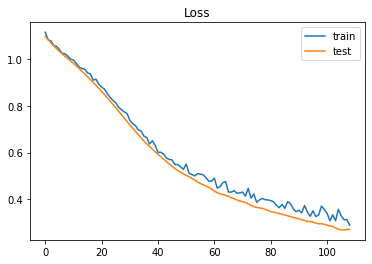

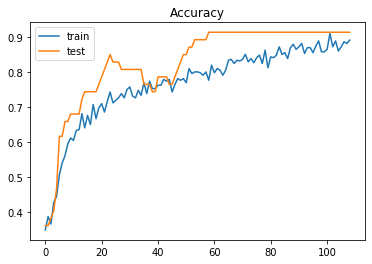

In [16]:
plot_loss(history)
plot_acuuracy(history)

In [17]:
print(classification_report(y_labels, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.90      0.95        40
           2       0.94      1.00      0.97        34

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



## Integrating the system

We'll use the following architecture to integrate our system as a whole.

<div align="center">
    <img src="docs/architecture.png" />
</div> 

We have exposed a REST API to send data generated in each sensor, so that the fusion module `ANN || SVM || kNN` 